In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Hi! lets work with the MNIST dataset. Same process, analyse the data, look at the interesting patterns, then put it all in the best model for the job, tune it, test, iterate. 

First comes the data!

In [2]:
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import mnist

#fetch and load dataset
(X, y), (test_X, test_y) = mnist.load_data()

#convert into dataframes for easier workflow
X = pd.DataFrame(np.reshape(X, (X.shape[0], -1)))
test_X = pd.DataFrame(np.reshape(test_X, (test_X.shape[0], -1)))

y = pd.DataFrame(y)
test_y=pd.DataFrame(test_y)

11490434/11490434 [==============================] - 0s 0us/step


No touching the test, but we sure can look at the training examples

In [3]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.columns

RangeIndex(start=0, stop=784, step=1)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


Okay, I guess textual data about pixel values isnt very useful. Still, its nice to know that the mean label is 4.5 with a standard deviation of about 3. Lets look at a graph for this.

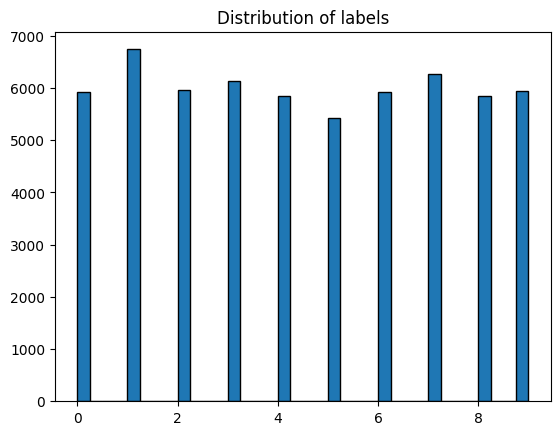

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y, bins='auto', edgecolor='black')
plt.title('Distribution of labels')
plt.show()

In [8]:
y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Okay, so its not a normal distribution, rather mostly a flat distrbution. And value_counts also confirms the same thing, theres mostly an equal number of training examples for each label, with the difference between the most(1) and least(5) being about a 1000 examples. What difference does this make during training, if any at all? I do not know, guess we will find out. 

Something I am curious about is if you took an average of all the examples, what would this average picture of a 'number' look like? Lets try to find out.

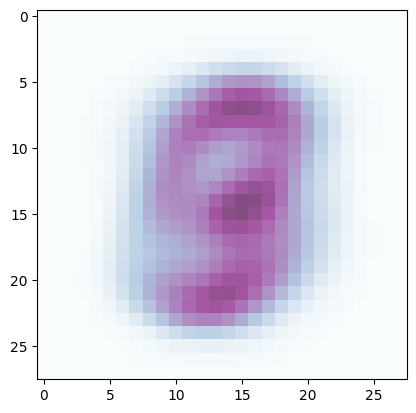

In [9]:
#the median works even better to show the 9-like shape
mean = X.mean()

#tinker with the alpha and cmap values to understand the picture better!
plt.imshow(mean.values.reshape(28,28), cmap = 'BuPu', alpha=0.7)

Hah! No wonder I havent seen anyone else use this, this doesnt convey anything much to me. Still, I guess the average figure does have a circle at the top and a little line at the bottom, perhaps also a dim curved line connecting the two, a little like a 9. This is a lot more apparent in this random colormap I chose called BuPu instead of gray. This information would likely be useful when developing more complex algorithms. 

Next up, lets make the data into something the models will perform well on. 

Given that our data doesnt follow a normal distribution, we will only normalise it using the MinMaxScaler.

In [10]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [11]:
X.shape

(60000, 784)

Okay, now lets pass it to the models. I tried logistic regression and K-Nearest Neighbors. Only best result code is left uncommented. 

In [12]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score


model = KNeighborsClassifier(n_neighbors = 3).fit(X, y)
# model = KNeighborsClassifier(n_neighbors = 3)

# cross_val_score(model, test_X, test_y, cv = 3, scoring = 'accuracy')
# cross_val_score(model, X, y, cv = 3, scoring = 'accuracy')


# pred = cross_val_predict(model, test_X, test_y, cv = 5)

test_X = MinMaxScaler().fit_transform(test_X)

pred = model.predict(test_X)
accuracy_score(test_y, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9705

In [13]:
f1_score(test_y, pred, average = 'weighted')

0.9704523390961245

Amazing! We have 0.97 accuracy and F1 score, which is really really good! The textbook I'm following said a simple fine-tune of KNearestNeighbors will give >97% accuracy, which is what I have. I used a series of GridSearchCVs to do this fine tuning, code for which is given below.

In [14]:
# #grid_search timessss

# from sklearn.model_selection import GridSearchCV

# # classes = {'weights': ('uniform', 'distance'), 'n_neighbors':(1, 10, 100)}
#best: weights: uniform(sklearn default), n_neighbors: 1

# # classes = {'n_neighbors':(1, 3, 5, 7, 9)}
#best: n_neighbors: 3

# # classes = {'n_neighbors':(3, 4, 5)}
#best: n_neighbors: 3

# model = KNeighborsClassifier()

# searchModel = GridSearchCV(model, classes, cv=5)

# searchModel.best_params_

Alrighty then, thats the end of this project. I could make further improvement to the score by augmenting a lot more data by simple manipulation of the pixel values, but the 97% score makes me happy enough for now. 

Thank you for reading until this point in my notebook! See ya in the next one 

:)